In [1]:
import numpy as np
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Rotation of ligand along the first principle component

Open a ligand file and read the coordinates

In [2]:
coords = []
with open("../../pdbbind_data/refined-set/10gs/10gs_pocket.pdb", "r") as f:
    for line in f.readlines():
        words = line.split()
        if words[0] == "HETATM":
            coords.append(words[5:8])

coords = np.array(coords, dtype=np.float32)
coords

array([[19.222, 10.125, 22.641],
       [14.836, 11.499, 17.763],
       [12.296, -1.485, 21.696],
       [15.392, 13.02 , 31.056],
       [15.898, 12.316, 28.42 ],
       [11.227,  5.784, 23.411],
       [13.969, 12.616, 26.601],
       [10.16 ,  0.31 , 24.282],
       [19.312,  2.039, 21.582],
       [18.411,  4.734, 18.522],
       [18.955,  4.897, 21.43 ],
       [ 5.802, 14.337, 37.928],
       [ 6.322, 16.122, 35.511],
       [11.584,  2.588, 23.272],
       [12.853,  1.052, 20.658],
       [10.77 , 15.081, 27.119],
       [11.028, 12.083, 23.872],
       [ 3.874,  1.565, 28.811],
       [ 8.6  ,  7.749, 17.971],
       [16.415,  9.458, 28.524],
       [ 7.037,  7.219, 26.157],
       [13.454, 17.756, 24.597],
       [13.508, 15.158, 25.523],
       [17.405, 12.665, 20.396]], dtype=float32)

Get the centroid and scale the coordinates around it

In [3]:
coords = coords - np.mean(coords, axis=0)
coords

array([[ 6.3749170e+00,  1.4296665e+00, -2.2649574e+00],
       [ 1.9889174e+00,  2.8036661e+00, -7.1429577e+00],
       [-5.5108356e-01, -1.0180333e+01, -3.2099590e+00],
       [ 2.5449171e+00,  4.3246670e+00,  6.1500416e+00],
       [ 3.0509167e+00,  3.6206665e+00,  3.5140419e+00],
       [-1.6200829e+00, -2.9113336e+00, -1.4949589e+00],
       [ 1.1219168e+00,  3.9206667e+00,  1.6950417e+00],
       [-2.6870832e+00, -8.3853331e+00, -6.2395859e-01],
       [ 6.4649172e+00, -6.6563334e+00, -3.3239574e+00],
       [ 5.5639162e+00, -3.9613333e+00, -6.3839588e+00],
       [ 6.1079168e+00, -3.7983336e+00, -3.4759579e+00],
       [-7.0450830e+00,  5.6416664e+00,  1.3022043e+01],
       [-6.5250831e+00,  7.4266663e+00,  1.0605043e+01],
       [-1.2630835e+00, -6.1073332e+00, -1.6339588e+00],
       [ 5.9165955e-03, -7.6433334e+00, -4.2479572e+00],
       [-2.0770826e+00,  6.3856668e+00,  2.2130413e+00],
       [-1.8190832e+00,  3.3876667e+00, -1.0339584e+00],
       [-8.9730835e+00, -7.1303

Let's calculate the variance in each direction

In [4]:
np.var(coords, axis=0)

array([18.745665, 30.959105, 24.73112 ], dtype=float32)

Perform PCA. Number of components is equal to the number of dimensions.

In [5]:
pca = PCA(n_components=3)
pca.fit(coords)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Get the eigen values (sorted in descending order)

In [6]:
pca.explained_variance_

array([44.45449 , 24.854885,  8.362877], dtype=float32)

Get the eigen vectors (Principal Components)

In [7]:
pca.components_

array([[-0.2993492 ,  0.6949612 ,  0.6537731 ],
       [-0.69489527, -0.6283331 ,  0.34974018],
       [-0.653843  ,  0.34960935, -0.6710162 ]], dtype=float32)

Get the covariance matrix. Diagonal elements are the variances along the corresponding axes.

In [8]:
pca.get_covariance()

array([[ 19.560696  ,  -0.30752325, -11.071461  ],
       [ -0.3075231 ,  32.30517   ,  12.773941  ],
       [-11.071461  ,  12.773943  ,  25.806404  ]], dtype=float32)

We can see that the coordinates are scattered mostly along the y axis, and then z and then x.

In [9]:
pca.explained_variance_ratio_

array([0.5723343 , 0.31999698, 0.10766879], dtype=float32)

The first principle component (pc) explains 57% of the variances, second one 32% and the 3rd one only 10%

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.5723343 , 0.89233124, 1.        ], dtype=float32)

The first 2 axes explains almost 90% of the variance.

Let's transform (re-orient) the points along the principle components

In [11]:
coords_pca = pca.transform(coords)

In [12]:
coords_pca

array([[-2.395532  , -6.1203527 , -2.1485462 ],
       [-3.3168156 , -5.641905  ,  4.4727893 ],
       [-9.008554  ,  5.6569343 , -1.0448825 ],
       [ 6.2643886 , -2.3348656 , -4.2788095 ],
       [ 3.9003193 , -3.1660504 , -3.0869806 ],
       [-2.5156574 ,  2.4322278 ,  1.0445924 ],
       [ 3.4970388 , -2.6502752 , -0.50025576],
       [-5.431032  ,  6.9178004 , -0.7559736 ],
       [-8.734275  , -1.4725672 , -4.323727  ],
       [-8.592188  , -3.610029  , -0.739106  ],
       [-6.7405825 , -3.0734258 , -2.9891272 ],
       [14.543141  ,  5.9050813 , -2.1592443 ],
       [14.047816  ,  3.5768394 , -0.25334406],
       [-4.934495  ,  4.143689  , -0.21290925],
       [-8.090792  ,  3.3127666 ,  0.17439927],
       [ 6.5063906 , -1.7949814 ,  2.1055884 ],
       [ 2.2228637 , -1.2261275 ,  3.067558  ],
       [ 0.28379193, 12.081328  ,  0.7538097 ],
       [-3.9201932 ,  1.1204572 ,  7.099548  ],
       [ 1.8273491 , -1.6931633 , -4.493987  ],
       [ 1.5311463 ,  5.4025674 ,  2.443

Let's find out the amount of variance in each of the axes.

In [13]:
np.var(coords_pca, axis=0)

array([42.602222, 23.819265,  8.014424], dtype=float32)

### 2D Plot <br>
In xy plane only

Before PCA

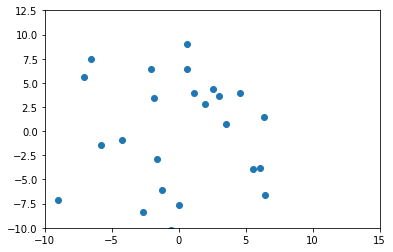

In [14]:
plt.figure()
plt.scatter(coords[:, 0], coords[:, 1])
plt.xlim([-10, 15])
plt.ylim([-10, 12.5])
plt.show()

After PCA

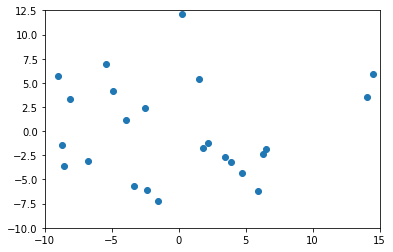

In [15]:
plt.figure()
plt.scatter(coords_pca[:, 0], coords_pca[:, 1])
plt.xlim([-10, 15])
plt.ylim([-10, 12.5])
plt.show()

### 3D Plot

Before PCA

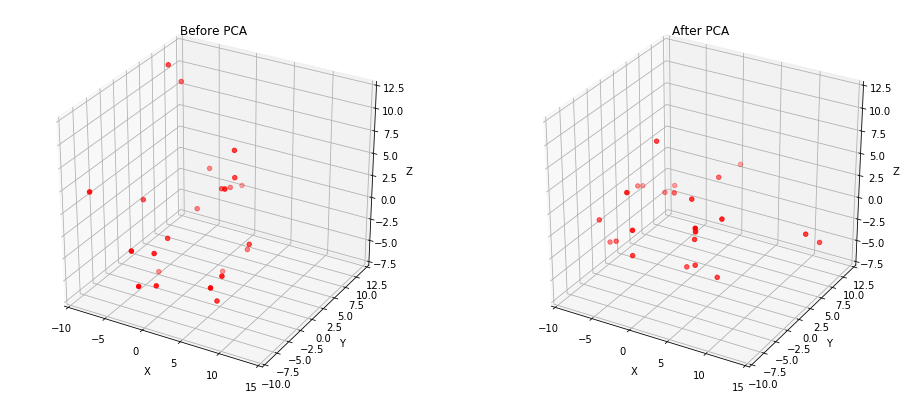

In [25]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='r', marker='o')

ax.set_title("Before PCA")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-10, 15])
ax.set_ylim([-10, 12.5])
ax.set_zlim([-7.5, 12.5])

ax = fig.add_subplot(122, projection='3d')
ax.scatter(coords_pca[:, 0], coords_pca[:, 1], coords_pca[:, 2], c='r', marker='o')

ax.set_title("After PCA")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-10, 15])
ax.set_ylim([-10, 12.5])
ax.set_zlim([-7.5, 12.5])

plt.show()

## Rotation of ligand in any direction

In [17]:
from math import sin, cos, radians

In [18]:
def Rx(theta):
    return np.array([[1, 0, 0],
                     [0, cos(radians(theta)), -sin(radians(theta))],
                     [0, sin(radians(theta)), cos(radians(theta))]])

In [19]:
def Ry(theta):
    return np.array([[cos(radians(theta)), 0, sin(radians(theta))],
                     [0, 1, 0],
                     [-sin(radians(theta)), 0, cos(radians(theta))]])

In [20]:
def Rz(theta):
    return np.array([[cos(radians(theta)), -sin(radians(theta)), 0],
                     [sin(radians(theta)), cos(radians(theta)), 0],
                     [0, 0, 1]])

In [21]:
def rotate(vector, x=0, y=0, z=0):
    """
    Method for rotating a vector about an arbitrary axis.
    
    INPUT: vector = Vector to be rotated (in numpy array, row vector format)
           x = Rotation about x axis
           y = Rotation about y axis
           z = Rotation about z axis
    OUTPUT: Rotated vector. (in row vector form)
    """
    # Get the rotation matrix
    R = np.matmul(Rz(z), Ry(y), Rx(x))
    return np.transpose(np.matmul(R, np.transpose(vector)))

### Example

Coordinates in xy plane

Now rotate 90 degrees about z axis

In [22]:
rot = rotate(coords_pca, z=90)

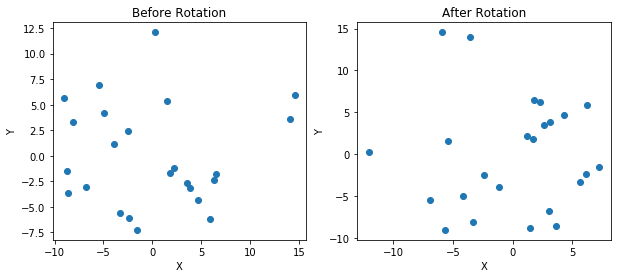

In [23]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title("Before Rotation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.scatter(coords_pca[:, 0], coords_pca[:, 1])

ax = fig.add_subplot(122)
ax.set_title("After Rotation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.scatter(rot[:, 0], rot[:, 1])
plt.show()